# Data Question 1: An Exploration of UN data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

- Take a look at the first 10 rows.
- Look at the last 5 rows. Do you see a problem?
- Redo the read_csv() call to correct this issue - do not modify the original csv file.

In [2]:
gdp_df = pd.read_csv('../Data/gdp_per_capita.csv')

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [5]:
gdp_df = pd.read_csv('../Data/gdp_per_capita.csv', nrows =6868) #skipfooter = 2 , gdp_df.drop(6868, 6869)

### 5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value': 'GDP_Per_Capita'})
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2019     2065.036398
1     Afghanistan  2018     2033.779002
2     Afghanistan  2017     2058.383832
3     Afghanistan  2016     2057.062164
4     Afghanistan  2015     2068.265904
...           ...   ...             ...
6863     Zimbabwe  1994     3263.934978
6864     Zimbabwe  1993     3033.504852
6865     Zimbabwe  1992     3054.889178
6866     Zimbabwe  1991     3426.598094
6867     Zimbabwe  1990     3324.348171

[6868 rows x 3 columns]


### 6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


### 7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [8]:
gdp_df["Year"].value_counts().sort_index()

1990    207
1991    208
1992    209
1993    212
1994    214
1995    221
1996    221
1997    223
1998    223
1999    224
2000    231
2001    232
2002    233
2003    233
2004    234
2005    234
2006    235
2007    235
2008    235
2009    236
2010    236
2011    237
2012    237
2013    238
2014    238
2015    238
2016    238
2017    238
2018    237
2019    231
Name: Year, dtype: int64

In [9]:
print(gdp_df.groupby(['Year'])['Year'].count())

Year
1990    207
1991    208
1992    209
1993    212
1994    214
1995    221
1996    221
1997    223
1998    223
1999    224
2000    231
2001    232
2002    233
2003    233
2004    234
2005    234
2006    235
2007    235
2008    235
2009    236
2010    236
2011    237
2012    237
2013    238
2014    238
2015    238
2016    238
2017    238
2018    237
2019    231
Name: Year, dtype: int64


Years 1990 to 2017 are represented in dataset. Number of observation per year is different that implies that GDP_Per_Capita data is not available for some countries for that year.

### 8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [10]:
gdp_df["Country"].value_counts().tail(10)

CuraÃ§ao                     20
Qatar                        20
Palau                        20
SÃ£o TomÃ© and Principe      19
Afghanistan                  18
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, dtype: int64

In [11]:
gdp_df["Country"].nunique()

238

In [12]:
gdp_df['Country'].value_counts().loc[lambda x : x < 20]

SÃ£o TomÃ© and Principe      19
Afghanistan                  18
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, dtype: int64

Total 238 countries are represented in dataset. Reasons for unavailability of data for few countries. https://datahelpdesk.worldbank.org/knowledgebase/articles/191133-why-are-some-data-not-available

### 9. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [13]:
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]
gdp_2014

,Country,Year,GDP_Per_Capita
5,Afghanistan,2014,2102.385234
23,Albania,2014,11623.866679
53,Algeria,2014,11512.705405
83,Angola,2014,8239.828837
113,Antigua and Barbuda,2014,18104.241470
...,...,...,...
6727,Vietnam,2014,6098.489609
6757,West Bank and Gaza,2014,5967.073437
6783,World,2014,15189.648507
6813,Zambia,2014,3450.046561


### 10. Use .describe() to find the summary statistics for GDP per capita in 2014.

In [14]:
gdp_2014['GDP_Per_Capita'].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

Mean is higher than median, May be the high value or distribution might be skewed. Possibly outliers, Posible skewed to the right.
Mean is smaller than standard deviation => Maybe skewed
Max value is 6.5 standard deviation above average, so likely an outlier

### 11. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

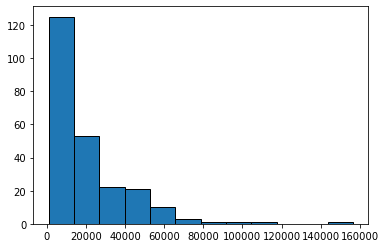

In [15]:
plt.hist(gdp_2014['GDP_Per_Capita'], bins=12, edgecolor = 'black');

The distribution is Right skewed, unimodal. 

### 12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.



In [16]:
gdp_2014.sort_values('GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881
...,...,...,...
4528,Niger,2014,1127.615541
1422,Dem. Rep. Congo,2014,1029.790785
3781,Malawi,2014,1027.208496
827,Burundi,2014,886.235777


Top Five = Macao SAR (China), Luxembourg, Qatar, Singapore, Bermuda

Bottom Five = Niger, Dem.Rep.Congo, Malawi, Burundi, Central African Republic

In [17]:
gdp_2014.nlargest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881


In [18]:
gdp_2014.nsmallest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541


### 13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivot

In [19]:
gdp_pivoted = pd.pivot_table(gdp_df.loc[gdp_df['Year'].isin([1990, 2017])], values = 'GDP_Per_Capita', index=['Country'], columns=['Year']).dropna()
gdp_pivoted

Year,1990,2017
Country,,
Albania,4842.734635,12811.759436
Algeria,8746.352901,11737.409353
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551675,19840.076123
Arab World,9694.667544,14555.474921
...,...,...
Vanuatu,2888.309393,3116.645194
Vietnam,1673.249634,7155.745829
World,9680.269697,16253.385518


In [20]:
#gdp_pivoted = gdp_df[(gdp_df["Year"] >= 1990) & (gdp_df["Year"] <= 2017 )]
#gdp_pivoted = gdp_pivoted.pivot_table(index='Country', columns='Year', values='GDP_Per_Capita', dropna=True)
#gdp_pivoted = gdp_pivoted.dropna(subset =[1990, 2017])

In [21]:
gdp_df.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year').dropna()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,10783.816180,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436,13366.303065,13724.058790
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,10970.705149,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353,11642.194485,11510.557088
Angola,5783.429064,5649.782130,5148.252824,3788.508107,3717.366881,4139.640473,4551.651329,4728.157560,4792.683851,4740.669833,...,7692.434616,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738,6933.505560,6670.332297
Antigua and Barbuda,15459.551675,15586.896172,15497.464744,15991.764201,16697.248772,15628.396992,16303.723892,16828.640823,17258.964856,17551.305968,...,18205.985369,17604.417102,17965.502327,17641.542533,18104.241470,18595.084904,19417.964819,19840.076123,21115.798269,21910.184985
Arab World,9694.667544,9651.626577,9933.531454,9927.649928,9957.387061,9913.934988,10136.058519,10311.064917,10624.718674,10606.027497,...,13347.112066,13531.438796,14032.961703,14155.876986,14219.562395,14441.436785,14663.549625,14555.474921,14622.065826,14602.938214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2888.309393,2897.327707,2886.920558,2824.882319,2999.097317,2956.627999,2962.647258,3051.178566,3033.908413,2989.091261,...,3239.887824,3192.453639,3159.338400,3131.971868,3116.077025,3037.784742,3061.787240,3116.645194,3128.469953,3153.015168
Vietnam,1673.249634,1736.014139,1847.620675,1957.644497,2091.599402,2252.633886,2425.526266,2587.055148,2701.770578,2797.785536,...,5089.411248,5352.011422,5574.458880,5815.118920,6098.489609,6438.260271,6767.902495,7155.745829,7586.384939,8041.178551
World,9680.269697,9645.256163,9647.070526,9657.888486,9783.828893,9943.132889,10167.967706,10396.385330,10508.291266,10731.543649,...,13904.629132,14275.461871,14554.850133,14857.762340,15189.648507,15516.986524,15837.382961,16253.385518,16636.415941,16911.193295


In [22]:
gdp_pivoted.columns

Int64Index([1990, 2017], dtype='int64', name='Year')

In [23]:
gdp_pivoted.info()
type(gdp_pivoted)

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, Albania to Zimbabwe
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    207 non-null    float64
 1   2017    207 non-null    float64
dtypes: float64(2)
memory usage: 4.9+ KB


pandas.core.frame.DataFrame

### 14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.



In [24]:
gdp_pivoted["Percentage_Change"] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990])/ gdp_pivoted[1990]
gdp_pivoted

Year,1990,2017,Percentage_Change
Country,,,
Albania,4842.734635,12811.759436,164.556297
Algeria,8746.352901,11737.409353,34.197756
Angola,5783.429064,7310.901738,26.411194
Antigua and Barbuda,15459.551675,19840.076123,28.335391
Arab World,9694.667544,14555.474921,50.138980
...,...,...,...
Vanuatu,2888.309393,3116.645194,7.905517
Vietnam,1673.249634,7155.745829,327.655604
World,9680.269697,16253.385518,67.902197


### 15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [25]:
len(gdp_pivoted[gdp_pivoted["Percentage_Change"] < 0])

17

In [26]:
#sum(n < 0 for n in gdp_pivoted['Percent_Change'].values.flatten())

### 16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.



In [27]:
gdp_pivoted.sort_values("Percentage_Change", ascending = False)

Year,1990,2017,Percentage_Change
Country,,,
Equatorial Guinea,1039.985049,22551.083246,2068.404561
China,1423.896348,14344.421239,907.406281
Myanmar,619.645144,4739.910118,664.939443
East Asia & Pacific (excluding high income),2173.223895,12986.322227,497.560254
East Asia & Pacific (IDA & IBRD),2196.950288,13123.151792,497.334945
...,...,...,...
Central African Republic,1201.677234,912.802052,-24.039332
Ukraine,15751.722440,11871.123624,-24.636028
Burundi,1184.842440,773.571858,-34.710993


In [28]:
gdp_pivoted.nlargest(2, "Percentage_Change")

Year,1990,2017,Percentage_Change
Country,,,
Equatorial Guinea,1039.985049,22551.083246,2068.404561
China,1423.896348,14344.421239,907.406281


In [29]:
gdp_df[gdp_df['Country'] == 'Equatorial Guinea']


,Country,Year,GDP_Per_Capita
1754,Equatorial Guinea,2019,18558.003852
1755,Equatorial Guinea,2018,20359.845144
1756,Equatorial Guinea,2017,22551.083246
1757,Equatorial Guinea,2016,24827.072978
1758,Equatorial Guinea,2015,28313.602763
1759,Equatorial Guinea,2014,32436.466793
1760,Equatorial Guinea,2013,33678.706547
1761,Equatorial Guinea,2012,36671.357436
1762,Equatorial Guinea,2011,35378.023284
1763,Equatorial Guinea,2010,34732.255956


In [30]:
gdp_df[gdp_df['Country']== 'Equatorial Guinea'].sort_values('Year')

,Country,Year,GDP_Per_Capita
1783,Equatorial Guinea,1990,1039.985049
1782,Equatorial Guinea,1991,996.857617
1781,Equatorial Guinea,1992,1299.934196
1780,Equatorial Guinea,1993,1395.403468
1779,Equatorial Guinea,1994,1572.065607
1778,Equatorial Guinea,1995,1781.264878
1777,Equatorial Guinea,1996,2857.452417
1776,Equatorial Guinea,1997,6868.480369
1775,Equatorial Guinea,1998,8166.052518
1774,Equatorial Guinea,1999,9851.190917


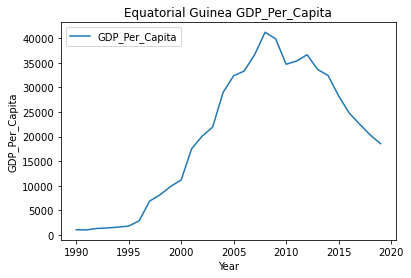

In [31]:
gdp_df[gdp_df['Country']== 'Equatorial Guinea'].sort_values('Year').plot.line(x='Year', y='GDP_Per_Capita')
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.title('Equatorial Guinea GDP_Per_Capita');

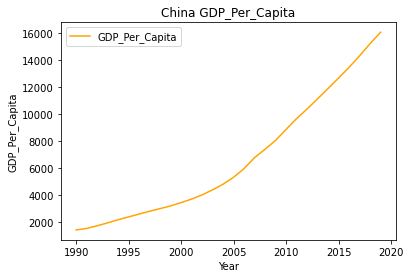

In [32]:
gdp_df[gdp_df['Country']== 'China'].sort_values('Year').plot.line(x='Year', y='GDP_Per_Capita', color ='orange')
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.title('China GDP_Per_Capita');

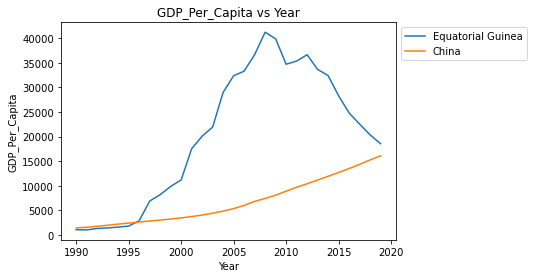

In [33]:

ax = gdp_df[gdp_df['Country']== 'Equatorial Guinea'].sort_values('Year').plot(kind = 'line', x ='Year', y ='GDP_Per_Capita',label = 'Equatorial Guinea')
gdp_df[gdp_df['Country']== 'China'].sort_values('Year').plot(kind = 'line', x ='Year', y ='GDP_Per_Capita',label = 'China', ax=ax)
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.legend(bbox_to_anchor =(1.0, 1.0))
plt.title('GDP_Per_Capita vs Year');

In [34]:
gdp_pivoted.nlargest(2, "Percentage_Change").index[0]

'Equatorial Guinea'

In [35]:
top_pc = gdp_pivoted.nlargest(2, "Percentage_Change").index[0]
second_pc = gdp_pivoted.nlargest(2, "Percentage_Change").index[1]

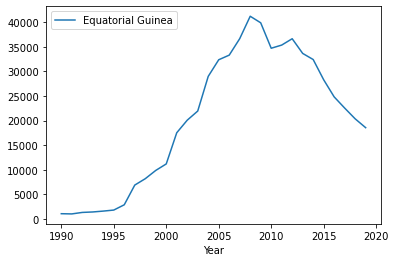

In [36]:
gdp_df[gdp_df['Country'] == top_pc].plot(x = 'Year', y = 'GDP_Per_Capita', label = top_pc);

For Equatorial Guinea the GDP_per_capita incresed exponentially till year 2008 and than it sttarted declining. For china, there is gradual increase in GDP_Per_Capita

### 17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [37]:
continents = pd.read_csv('../data/continents.csv')

In [38]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


### 18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.



In [39]:
gdp_df = gdp_df.merge(continents,how ='inner') # on = 'Country' can also be used
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia
...,...,...,...,...
5438,Zimbabwe,1994,3263.934978,Africa
5439,Zimbabwe,1993,3033.504852,Africa
5440,Zimbabwe,1992,3054.889178,Africa
5441,Zimbabwe,1991,3426.598094,Africa


In [40]:
continents.shape

(216, 2)

### 19. Determine the number of countries per continent. Create a bar chart showing this.

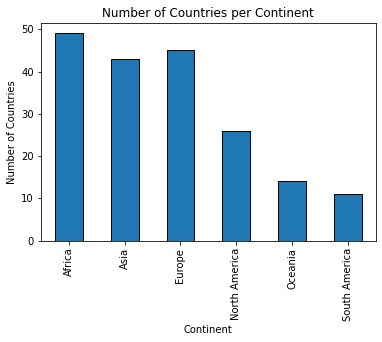

In [41]:
gdp_df.groupby('Continent')['Country'].nunique().plot(kind = 'bar', edgecolor ='black')
plt.ylabel('Number of Countries')
plt.title('Number of Countries per Continent');

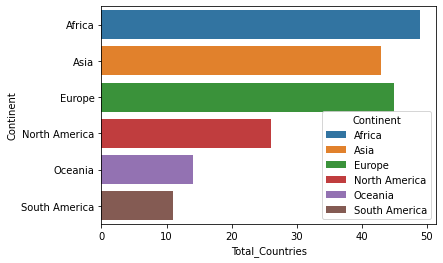

In [42]:
sns.barplot(data=gdp_df.groupby(['Continent'])['Country']
            .nunique()
            .to_frame()
            .reset_index()
            .rename(columns = {'Country' : 'Total_Countries'}), 
            y='Continent', 
            x='Total_Countries', 
            hue='Continent', 
            dodge=False);

### 20. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

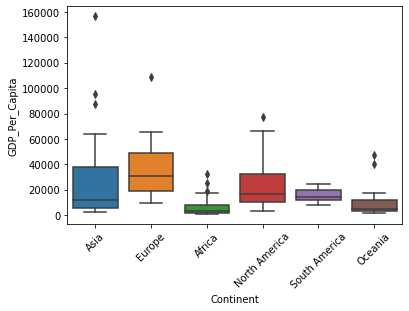

In [43]:
#gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
sns.boxplot(data = gdp_df[gdp_df['Year'] == 2014], x ='Continent', y ='GDP_Per_Capita')
plt.xticks(rotation = 45);


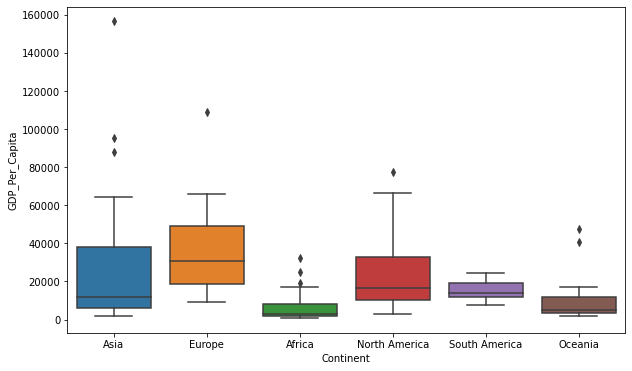

In [44]:
fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(
    data = gdp_df[gdp_df['Year'] == 2014],
    x = 'Continent',
    y = 'GDP_Per_Capita',
    ax = ax
);

The mean GDP_Per_Capita for European countries is higher than other countries.The african countries has lowest GDP_Per_Capita. 

### 21. Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy.

In [45]:
life_expectancy = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_4553490.csv', header = 2)
life_expectancy

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,...,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.797561,71.097561,71.346341,71.846341,72.295122,72.695122,73.092683,71.087805,NaN,NaN
262,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,29.919000,30.163000,30.500000,30.943000,31.501000,32.175000,...,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,66.125000,66.181000,NaN,NaN
263,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,48.406000,48.777000,49.142000,49.509000,49.888000,50.284000,...,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,64.131000,64.379000,NaN,NaN
264,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.687000,47.084000,47.446000,47.772000,48.068000,48.351000,...,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,63.886000,64.194000,NaN,NaN


### 22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.



In [46]:
life_expectancy = life_expectancy.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'])

In [47]:
life_expectancy.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,68.436000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,45.213048,45.594294,45.974059,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN
2,Afghanistan,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,35.430000,35.914000,36.403000,...,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN,NaN
3,Africa Western and Central,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,39.662762,40.066408,40.482832,...,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN,NaN
4,Angola,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,39.454000,39.813000,40.178000,...,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN,NaN


In [ ]:
#life_expectancy = life_expectancy.melt(id_vars = ['Country Name'])
#life_expectancy

In [48]:
life_expectancy = life_expectancy.melt(
                  id_vars="Country Name",
                  var_name="Year", 
                  value_name="Life Expectancy")
life_expectancy

,Country Name,Year,Life Expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053
2,Afghanistan,1960,32.446000
3,Africa Western and Central,1960,37.205380
4,Angola,1960,37.524000
...,...,...,...
16753,Kosovo,Unnamed: 66,NaN
16754,"Yemen, Rep.",Unnamed: 66,NaN
16755,South Africa,Unnamed: 66,NaN
16756,Zambia,Unnamed: 66,NaN


### 23. What was the first country with a life expectancy to exceed 80?

In [49]:
life_expectancy[life_expectancy['Life Expectancy'] > 80].sort_values('Year')

,Country Name,Year,Life Expectancy
9695,Japan,1996,80.200244
9938,"Hong Kong SAR, China",1997,80.126829
9961,Japan,1997,80.424146
10204,"Hong Kong SAR, China",1998,80.131707
10227,Japan,1998,80.501463
...,...,...,...
16037,France,2020,82.175610
16038,Faroe Islands,2020,83.092683
16041,United Kingdom,2020,80.902439
16053,Guam,2020,80.277000


In [55]:
life_expectancy[life_expectancy['Life Expectancy'] > 80].sort_values('Year').head(1)

,Country Name,Year,Life Expectancy
9695,Japan,1996,80.200244


Japan is the first country with a life expectancy to exceed 80.

### 24. Merge gdp_per_capita and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [50]:
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia
...,...,...,...,...
5438,Zimbabwe,1994,3263.934978,Africa
5439,Zimbabwe,1993,3033.504852,Africa
5440,Zimbabwe,1992,3054.889178,Africa
5441,Zimbabwe,1991,3426.598094,Africa


In [51]:
life_expectancy

,Country Name,Year,Life Expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053
2,Afghanistan,1960,32.446000
3,Africa Western and Central,1960,37.205380
4,Angola,1960,37.524000
...,...,...,...
16753,Kosovo,Unnamed: 66,NaN
16754,"Yemen, Rep.",Unnamed: 66,NaN
16755,South Africa,Unnamed: 66,NaN
16756,Zambia,Unnamed: 66,NaN


In [52]:
gdp_df['Year'] = gdp_df['Year'].astype(str)

In [53]:
life_expectancy['Year'] = life_expectancy['Year'].astype(str)

In [54]:
gdp_le = pd.merge(left = gdp_df, 
         right = life_expectancy.rename(columns = {'Country Name': 'Country'}), 
         left_on = ['Country', 'Year'], 
         right_on = ['Country', 'Year'])
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
1,Afghanistan,2018,2033.779002,Asia,64.486
2,Afghanistan,2017,2058.383832,Asia,64.130
3,Afghanistan,2016,2057.062164,Asia,63.763
4,Afghanistan,2015,2068.265904,Asia,63.377
...,...,...,...,...,...
5109,Zimbabwe,1994,3263.934978,Africa,52.044
5110,Zimbabwe,1993,3033.504852,Africa,53.653
5111,Zimbabwe,1992,3054.889178,Africa,55.243
5112,Zimbabwe,1991,3426.598094,Africa,56.749


### 25. Create a new DataFrame, named gdp_le_2019 by extracting data for the year 2019 from gdp_le. How many countries have a life expectancy of at least 80 in 2019?

In [59]:
gdp_le['Year'] = gdp_le['Year'].astype(int) #Converting year back to integer

In [60]:
gdp_le_2019 = gdp_le[gdp_le['Year'] == 2019].copy()
gdp_le_2019

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
18,Albania,2019,13724.058790,Europe,78.573
48,Algeria,2019,11510.557088,Africa,76.880
78,Angola,2019,6670.332297,Africa,61.147
108,Antigua and Barbuda,2019,21910.184985,North America,77.016
...,...,...,...,...,...
4968,Vanuatu,2019,3153.015168,Oceania,70.474
4998,Vietnam,2019,8041.178551,Asia,75.400
5028,West Bank and Gaza,2019,6219.960291,Asia,74.053
5054,Zambia,2019,3470.448801,Africa,63.886


In [65]:
gdp_le_2019[gdp_le_2019['Life Expectancy'] >= 80].count()

Country            33
Year               33
GDP_Per_Capita     33
Continent          33
Life Expectancy    33
dtype: int64

33 countries have a life expectancy of at least 80 in 2019.

### 26. Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [66]:
gdp_le_2019.nlargest(3, "GDP_Per_Capita")

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
2676,"Macao SAR, China",2019,123965.286432,Asia,84.244000
2646,Luxembourg,2019,114304.044210,Europe,82.639024
4051,Singapore,2019,97341.468645,Asia,83.595122


In [63]:
gdp_le_3 = gdp_le.loc[gdp_le['Country'].isin(['Macao SAR, China','Luxembourg', 'Singapore'])]
gdp_le_3

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
2646,Luxembourg,2019,114304.044210,Europe,82.639024
2647,Luxembourg,2018,113952.357895,Europe,82.295122
2648,Luxembourg,2017,112666.769445,Europe,82.095122
2649,Luxembourg,2016,113396.753760,Europe,82.685366
2650,Luxembourg,2015,110798.736180,Europe,82.292683
...,...,...,...,...,...
4076,Singapore,1994,46895.053010,Asia,76.197561
4077,Singapore,1993,43555.619036,Asia,76.046341
4078,Singapore,1992,40077.548794,Asia,75.946341
4079,Singapore,1991,38728.403909,Asia,75.646341


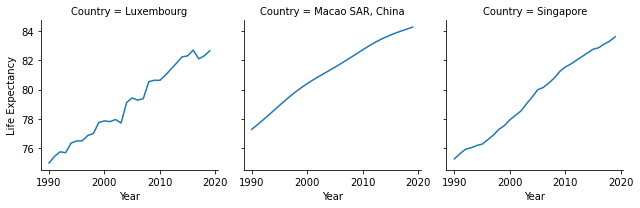

In [64]:
g = sns.FacetGrid(gdp_le_3, col = 'Country')
g.map(sns.lineplot,'Year','Life Expectancy');

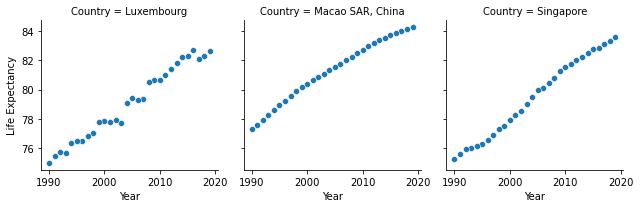

In [75]:
g = sns.FacetGrid(gdp_le_3, col = 'Country')
g.map(sns.scatterplot,'Year','Life Expectancy');

### 27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

In [67]:
gdp_le_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 5084
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          172 non-null    object 
 1   Year             172 non-null    int64  
 2   GDP_Per_Capita   172 non-null    float64
 3   Continent        172 non-null    object 
 4   Life Expectancy  167 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.1+ KB


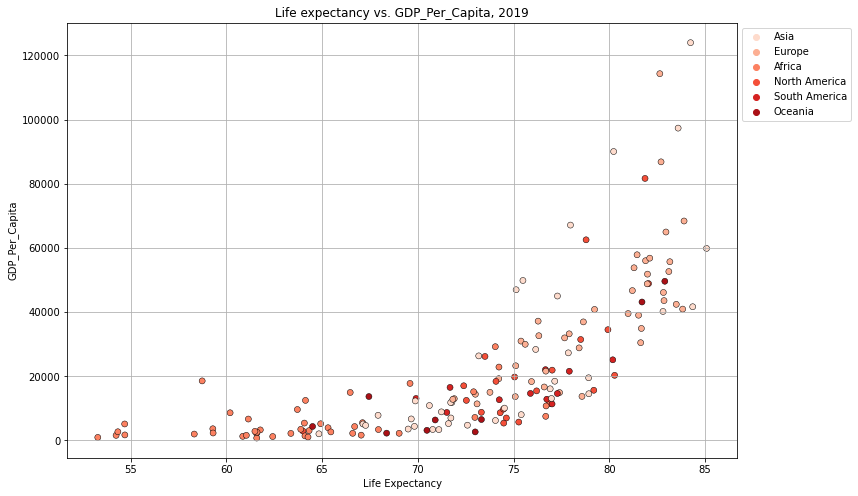

In [70]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = gdp_le_2019, x = 'Life Expectancy', y = 'GDP_Per_Capita',
                hue = 'Continent', palette = 'Reds', edgecolor = 'black')
plt.title('Life expectancy vs. GDP_Per_Capita, 2019')
plt.grid(True)
plt.legend(bbox_to_anchor =(1.0, 1.0));

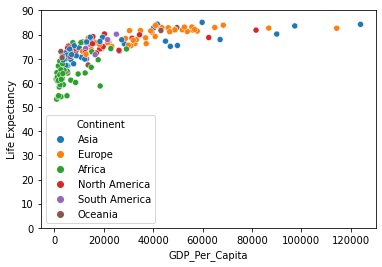

In [77]:
gdp_le_sc = sns.scatterplot(data=gdp_le_2019, x='GDP_Per_Capita', y='Life Expectancy', hue='Continent')
gdp_le_sc.set(ylim=(0,90));

Positive relationship between life_expectancy and GDP_Per_Capita. Directly proportional. Although there is lot of variability between the countries.

### 28. Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?



In [71]:
gdp_le_2019[['Life Expectancy', 'GDP_Per_Capita']].corr()

,Life Expectancy,GDP_Per_Capita
Life Expectancy,1.000000,0.709018
GDP_Per_Capita,0.709018,1.000000


Moderately Strong positive correlation between life expectancy and GDP_Per_Capita

### 29. Add a column to gdp_le_2019 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.



In [72]:
gdp_le_2019["log_GDP_Per_Capita"] = np.log(gdp_le_2019["GDP_Per_Capita"]) 
gdp_le_2019
gdp_le_2019[['Life Expectancy', 'log_GDP_Per_Capita']].corr()


,Life Expectancy,log_GDP_Per_Capita
Life Expectancy,1.000000,0.848498
log_GDP_Per_Capita,0.848498,1.000000


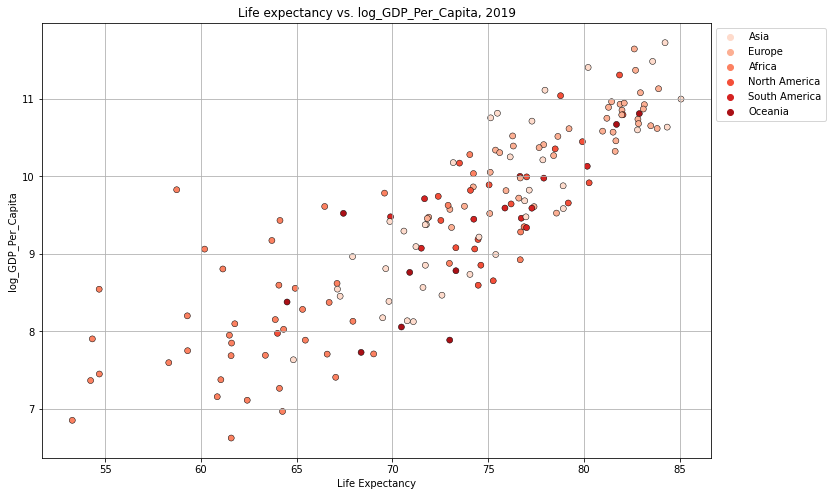

In [74]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = gdp_le_2019, x = 'Life Expectancy', y = 'log_GDP_Per_Capita',
                hue = 'Continent', palette = 'Reds', edgecolor = 'black')
plt.title('Life expectancy vs. log_GDP_Per_Capita, 2019')
plt.legend(bbox_to_anchor =(1.0, 1.0))
plt.grid(True);